In [1]:
import argparse
import pandas as pd
import numpy as np
import mylib.data_preprocessing as dpp

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from keras.utils import np_utils
from keras.models import load_model

from keras.models import Sequential
from keras.layers import Dense
from keras.layers.normalization import BatchNormalization
from keras.optimizers import Adam, SGD
from keras.layers import LeakyReLU


if __name__ == "__main__":
#     # Read dataset from command line
#     key_word = "--dataset"
#     parser = argparse.ArgumentParser()
#     parser.add_argument(key_word, required=False, default='../data/skeleton_raw.csv')
#     input = parser.parse_args().dataset

    # Loading training data
#     input = 'C:/Users/Aditya Jethliya/Desktop/Bennett Project/training.csv'
    try:
        raw_data = pd.read_csv('C:/Users/Aditya Jethliya/Desktop/Bennett Project/Ourdata_cleaned_replaced.csv', header=0)
    except:
        print("Dataset not exists.")
    # X: input, Y: output
    dataset = raw_data.values
    X = dataset[:, 3:39].astype(float)
    Y = dataset[:, 39]
    print(set(Y))

    # Data pre-processing
    # X = dpp.head_reference(X)
#     X_pp = []
#     for i in range(len(X)):
#         X_pp.append(dpp.pose_normalization(X[i]))
#     X_pp = np.array(X_pp)

    # Encoder the class label to number
    # Converts a class vector (integers) to binary class matrix
    encoder = LabelEncoder()
    encoder_Y = encoder.fit_transform(Y)
    matrix_Y = np_utils.to_categorical(encoder_Y)
    #print(Y[0], ": ", encoder_Y[0])
    #print(Y[650], ": ", encoder_Y[650])
    #print(Y[1300], ": ", encoder_Y[1300])
    #print(Y[1950], ": ", encoder_Y[1950])
    #print(Y[2600], ": ", encoder_Y[2600])

    # Split into training and testing data
    # random_state:
    X_train, X_test, Y_train, Y_test = train_test_split(X, matrix_Y, test_size=0.2, random_state=42)

    # Build DNN model with keras
    model = Sequential()
    model.add(Dense(units=256, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(units=512, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(units=64, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(units=14, activation='softmax'))

    # Training
    # optimiser: Adam with learning rate 0.0001
    # loss: categorical_crossentropy for the matrix form matrix_Y
    # metrics: accuracy is evaluated for the model
    model.compile(optimizer=Adam(0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
    # batch_size: number of samples per gradient update
    # epochs: how many times to pass through the whole training set
    # verbose: show one line for every completed epoch
    history = model.fit(X_train, Y_train, batch_size=128, epochs=50, verbose=2, validation_data=(X_test, Y_test))
    
    Y_test1 = np.argmax(Y_test, axis=1) # Convert one-hot to index
    y_pred = model.predict_classes(X_test)
    print(classification_report(Y_test1, y_pred))
    # Save the trained model
    model_json = model.to_json()
    with open("C:/Users/Aditya Jethliya/Desktop/Bennett Project/model.json", "w") as json_file:
        json_file.write(model_json)
    model.save_weights("C:/Users/Aditya Jethliya/Desktop/Bennett Project/ours1.h5")
    print("Saved model to disk")
#     model.save('C:/Users/Aditya Jethliya/Desktop/Bennett Project/ours1.h5')


Using TensorFlow backend.


{'sitting', 'Pushing', 'Swinging Pipe', 'SOS', 'Walking', 'standing', 'Running', 'throwing', 'punch', 'Fall', 'kick', 'waving', 'Jumping', 'strangling'}
Train on 25148 samples, validate on 6288 samples
Epoch 1/50
 - 2s - loss: 1.8597 - accuracy: 0.4380 - val_loss: 1.7336 - val_accuracy: 0.4604
Epoch 2/50
 - 1s - loss: 1.2614 - accuracy: 0.6202 - val_loss: 1.1897 - val_accuracy: 0.6463
Epoch 3/50
 - 1s - loss: 1.0350 - accuracy: 0.6856 - val_loss: 1.0224 - val_accuracy: 0.6980
Epoch 4/50
 - 1s - loss: 0.8868 - accuracy: 0.7351 - val_loss: 0.8702 - val_accuracy: 0.7511
Epoch 5/50
 - 1s - loss: 0.7766 - accuracy: 0.7697 - val_loss: 0.7526 - val_accuracy: 0.7953
Epoch 6/50
 - 1s - loss: 0.6903 - accuracy: 0.7961 - val_loss: 0.7050 - val_accuracy: 0.8039
Epoch 7/50
 - 1s - loss: 0.6245 - accuracy: 0.8165 - val_loss: 0.6201 - val_accuracy: 0.8268
Epoch 8/50
 - 1s - loss: 0.5675 - accuracy: 0.8348 - val_loss: 0.5695 - val_accuracy: 0.8548
Epoch 9/50
 - 1s - loss: 0.5154 - accuracy: 0.8522 - v

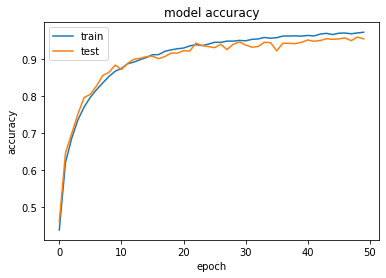

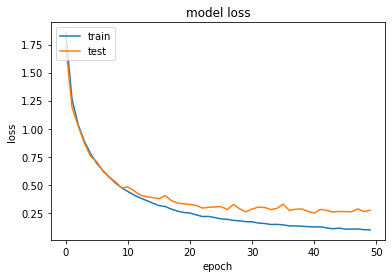

In [4]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('model_accuracy_14categories.png')
plt.show()


# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('model_loss_14categories.png')
plt.show()


In [6]:
import pandas as pd
Y_test1 = np.argmax(Y_test, axis=1) # Convert one-hot to index
y_pred = model.predict_classes(X_test)
report = classification_report(Y_test1, y_pred,output_dict=True)
df = pd.DataFrame(report).transpose()
hist_df = pd.DataFrame(history.history) 
hist_csv_file = 'history.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

In [7]:
from sklearn.metrics import confusion_matrix
log_cfm = confusion_matrix(Y_test1, y_pred)
print("Confusion matrix:")
print(log_cfm, end='\n\n')

Confusion matrix:
[[ 201    1    0    0    0    0    0    1    0    0    0    0    1    0]
 [   0  271    0    2    0    0    0    0    0    0    0    0    1    0]
 [   0    0  296    0    0   17    6    0    3    0    4    0    0    0]
 [   4    1    6 1013    1    3   86    4    0    2    2    0    6    2]
 [   0    0    0    0  324    2    1    0    0    0    0    0    1    3]
 [   0    2    0    1    0  567    3    1    0    0    1    2    5    0]
 [   0   12    2   26    2    2 1612    2    0    2   12    0    9    0]
 [   0    0    0    0    0    5    0  221    0    0    0    0    0    0]
 [   0    0    1    0    0    1    0    0  330    0    0    0    0    0]
 [   0    0    0    2    0    0   19    0    0  153    0    0    0    0]
 [   0    1    0    0    0    0    1    0    0    0  232    0    0    0]
 [   0    1    0    4    0    2    0    0    0    0    0  249    0    0]
 [   0    0    0    3    0    0    3    0    0    0    0    4  315    0]
 [   0    0    0    0    0    0  

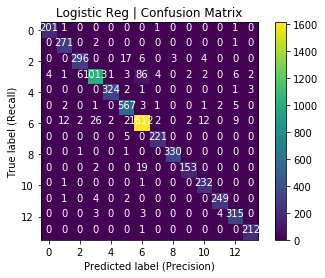

In [9]:
import itertools
plt.imshow(log_cfm, interpolation='nearest')

for i, j in itertools.product(range(log_cfm.shape[0]), range(log_cfm.shape[1])):
    plt.text(j, i, log_cfm[i, j],
             horizontalalignment="center",
             color="white")

plt.ylabel('True label (Recall)')
plt.xlabel('Predicted label (Precision)')
plt.title('Logistic Reg | Confusion Matrix')
plt.colorbar();

In [14]:
labels = list(encoder.classes_)

In [11]:
encoder.transform(list(encoder.classes_))

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13],
      dtype=int64)

In [12]:
tested = list(encoder.inverse_transform(Y_test1))
predicted = list(encoder.inverse_transform(y_pred))

[[ 201    1    0    0    0    0    0    1    0    0    0    0    1    0]
 [   0  271    0    2    0    0    0    0    0    0    0    0    1    0]
 [   0    0  296    0    0   17    6    0    3    0    4    0    0    0]
 [   4    1    6 1013    1    3   86    4    0    2    2    0    6    2]
 [   0    0    0    0  324    2    1    0    0    0    0    0    1    3]
 [   0    2    0    1    0  567    3    1    0    0    1    2    5    0]
 [   0   12    2   26    2    2 1612    2    0    2   12    0    9    0]
 [   0    0    0    0    0    5    0  221    0    0    0    0    0    0]
 [   0    0    1    0    0    1    0    0  330    0    0    0    0    0]
 [   0    0    0    2    0    0   19    0    0  153    0    0    0    0]
 [   0    1    0    0    0    0    1    0    0    0  232    0    0    0]
 [   0    1    0    4    0    2    0    0    0    0    0  249    0    0]
 [   0    0    0    3    0    0    3    0    0    0    0    4  315    0]
 [   0    0    0    0    0    0    1    0    0    0

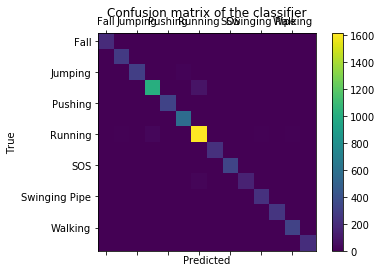

In [15]:
cm = confusion_matrix(tested, predicted, labels)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [16]:
y_actu = pd.Series(tested, name='Actual')
y_pred1 = pd.Series(predicted, name='Predicted')
df_confusion = pd.crosstab(y_actu, y_pred1)

In [17]:
df_confusion

Predicted,Fall,Jumping,Pushing,Running,SOS,Swinging Pipe,Walking,kick,punch,sitting,standing,strangling,throwing,waving
Actual,,,,,,,,,,,,,,
Fall,201,1,0,0,0,0,0,1,0,0,0,0,1,0
Jumping,0,271,0,2,0,0,0,0,0,0,0,0,1,0
Pushing,0,0,296,0,0,17,6,0,3,0,4,0,0,0
Running,4,1,6,1013,1,3,86,4,0,2,2,0,6,2
SOS,0,0,0,0,324,2,1,0,0,0,0,0,1,3
Swinging Pipe,0,2,0,1,0,567,3,1,0,0,1,2,5,0
Walking,0,12,2,26,2,2,1612,2,0,2,12,0,9,0
kick,0,0,0,0,0,5,0,221,0,0,0,0,0,0
punch,0,0,1,0,0,1,0,0,330,0,0,0,0,0


In [18]:
name = 'confusion_matrix14.csv'
with open(name, mode='w') as f:
    df_confusion.to_csv(f)

In [ ]:
model_json = model.to_json()
with open("C:/Users/Aditya Jethliya/Desktop/Bennett Project/model.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights("C:/Users/Aditya Jethliya/Desktop/Bennett Project/ours1.h5")
print("Saved model to disk")

In [21]:
import numpy as np
import pandas as pd

from sklearn.metrics import classification_report
from  sklearn.metrics import precision_recall_fscore_support

np.random.seed(0)

y_true = np.array([0]*400 + [1]*600)
y_pred = np.random.randint(2, size=1000)

def pandas_classification_report(y_true, y_pred):
    metrics_summary = precision_recall_fscore_support(
            y_true=y_true, 
            y_pred=y_pred)

    avg = list(precision_recall_fscore_support(
            y_true=y_true, 
            y_pred=y_pred,
            average='weighted'))

    metrics_sum_index = ['precision', 'recall', 'f1-score', 'support']
    class_report_df = pd.DataFrame(
        list(metrics_summary),
        index=metrics_sum_index)

    support = class_report_df.loc['support']
    total = support.sum() 
    avg[-1] = total

    class_report_df['avg / total'] = avg

    return class_report_df.T
print(classification_report(y_true=tested, y_pred=predicted, digits=6))

               precision    recall  f1-score   support

         Fall   0.980488  0.985294  0.982885       204
      Jumping   0.937716  0.989051  0.962700       274
      Pushing   0.970492  0.907975  0.938193       326
      Running   0.963844  0.896460  0.928932      1130
          SOS   0.990826  0.978852  0.984802       331
Swinging Pipe   0.946578  0.974227  0.960203       582
      Walking   0.930716  0.958953  0.944623      1681
         kick   0.965066  0.977876  0.971429       226
        punch   0.990991  0.993976  0.992481       332
      sitting   0.974522  0.879310  0.924471       174
     standing   0.924303  0.991453  0.956701       234
   strangling   0.976471  0.972656  0.974560       256
     throwing   0.931953  0.969231  0.950226       325
       waving   0.976959  0.995305  0.986047       213

     accuracy                       0.953562      6288
    macro avg   0.961494  0.962187  0.961304      6288
 weighted avg   0.954167  0.953562  0.953350      6288



In [24]:
df_class_report = classification_report(y_true=tested, y_pred=predicted)
print(df_class_report)
df_class_report.to_csv('precision_recall_14categories.csv',  sep=',')

               precision    recall  f1-score   support

         Fall       0.98      0.99      0.98       204
      Jumping       0.94      0.99      0.96       274
      Pushing       0.97      0.91      0.94       326
      Running       0.96      0.90      0.93      1130
          SOS       0.99      0.98      0.98       331
Swinging Pipe       0.95      0.97      0.96       582
      Walking       0.93      0.96      0.94      1681
         kick       0.97      0.98      0.97       226
        punch       0.99      0.99      0.99       332
      sitting       0.97      0.88      0.92       174
     standing       0.92      0.99      0.96       234
   strangling       0.98      0.97      0.97       256
     throwing       0.93      0.97      0.95       325
       waving       0.98      1.00      0.99       213

     accuracy                           0.95      6288
    macro avg       0.96      0.96      0.96      6288
 weighted avg       0.95      0.95      0.95      6288



AttributeError: 'str' object has no attribute 'to_csv'